In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the file to work with
from google.colab import files
uploaded = files.upload()

Saving penguins_size.csv to penguins_size.csv


Load and Inspect the Data

In [3]:
# Load the penguins_size.csv dataset
df = pd.read_csv('penguins_size.csv')
print(df.shape)
df.head()

(344, 7)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Data Cleansing

In [5]:
# Missing data
df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


In [7]:
# Handling missing values
# Import the necessary library
from sklearn.impute import SimpleImputer

# Setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')

df.iloc[:,:] = imputer.fit_transform(df)

df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [6]:
# Check the data type if each column
df.dtypes

,0
species,object
island,object
culmen_length_mm,float64
culmen_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object


In [11]:
# Check how the data looks after cleaning
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Visualisation

In [12]:
# Number of species
df['species'].value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


<Axes: xlabel='species', ylabel='count'>

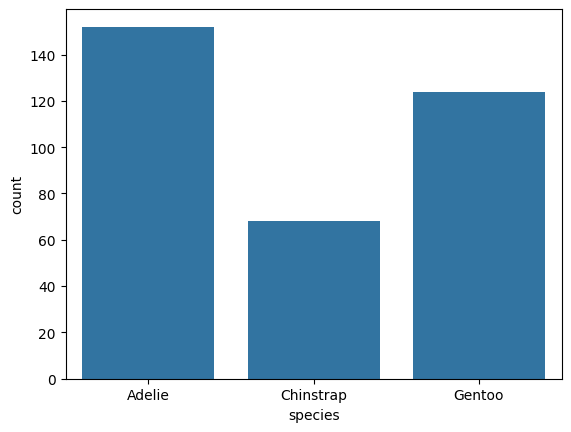

In [15]:
# Graph showing the number of penguins per species
sns.countplot(x='species', data=df)

In [13]:
# Number of penguins per island
df['island'].value_counts()

,count
island,
Biscoe,168
Dream,124
Torgersen,52


<Axes: xlabel='island', ylabel='count'>

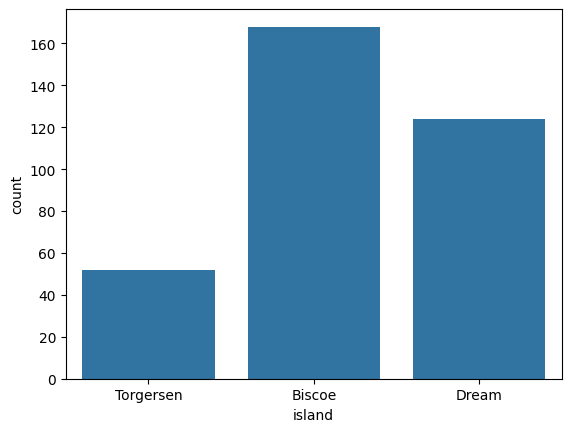

In [14]:
# Graph showing the number of penguins per island
sns.countplot(x='island', data=df)

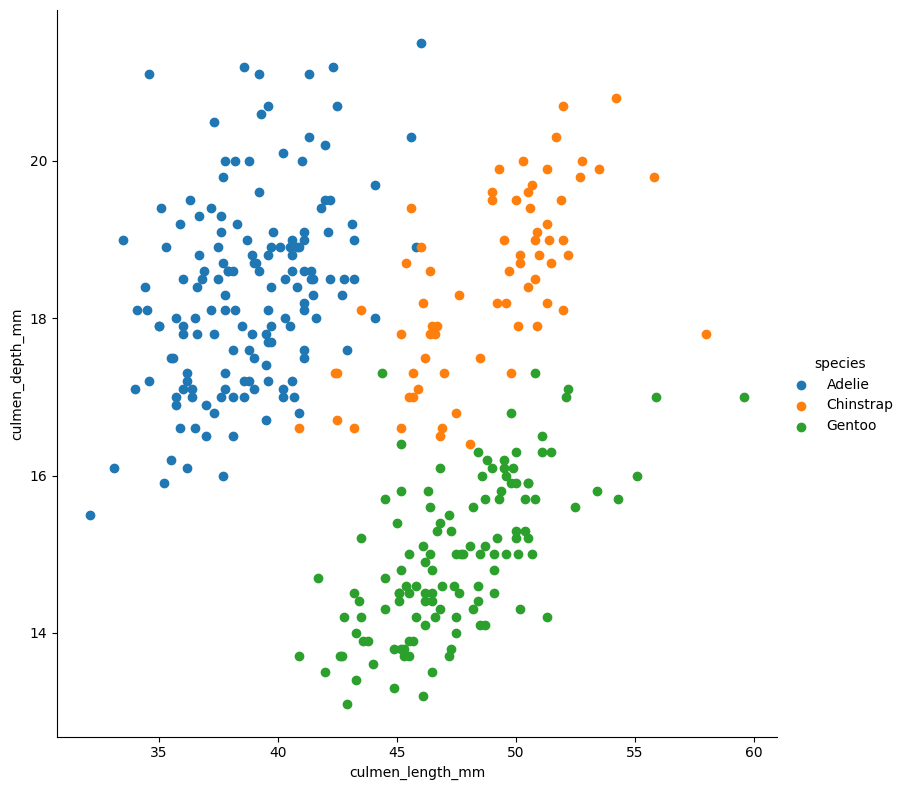

In [26]:
# culmen_depth vs culmen_length
sns.FacetGrid(df, hue="species", height=8)\
.map(plt.scatter, "culmen_length_mm", "culmen_depth_mm")\
.add_legend()

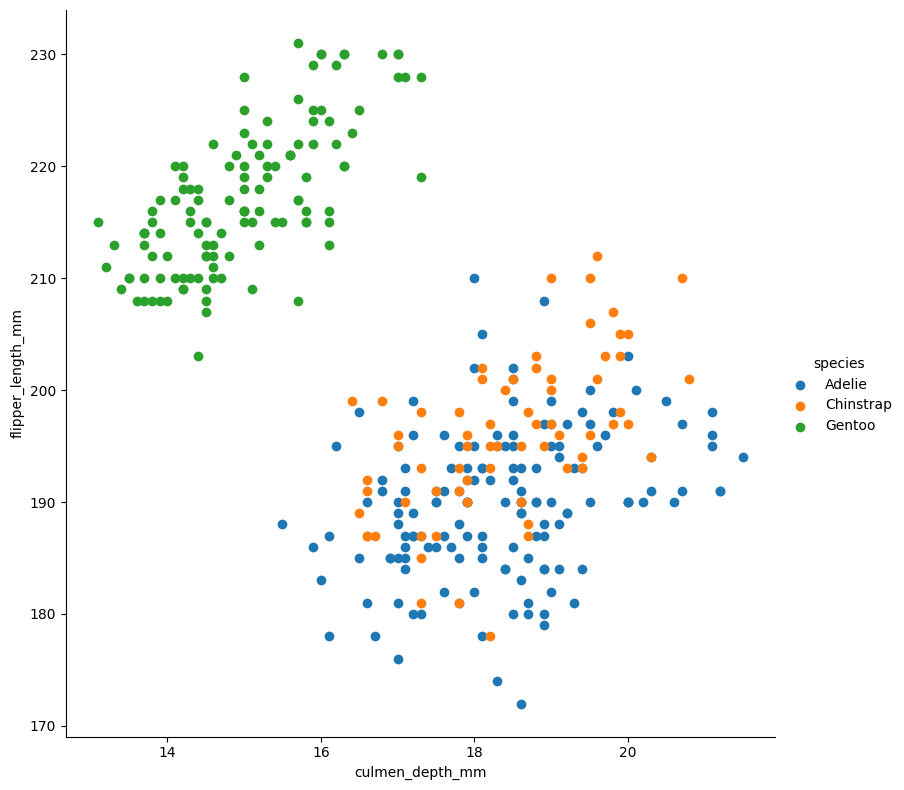

In [29]:
# culmen_depth vs flipperlength
sns.FacetGrid(df, hue="species", height=8)\
.map(plt.scatter, "culmen_depth_mm", "flipper_length_mm")\
.add_legend()

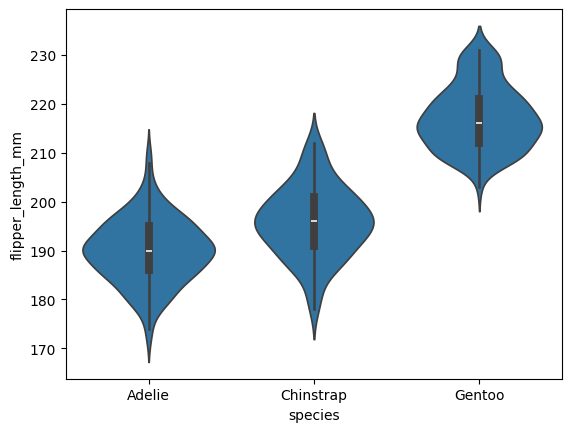

In [34]:
# Flipper length distribution
ax = sns.violinplot(x="species", y="flipper_length_mm", data=df)

Text(0.5, 1.0, 'body_mass_g per species')

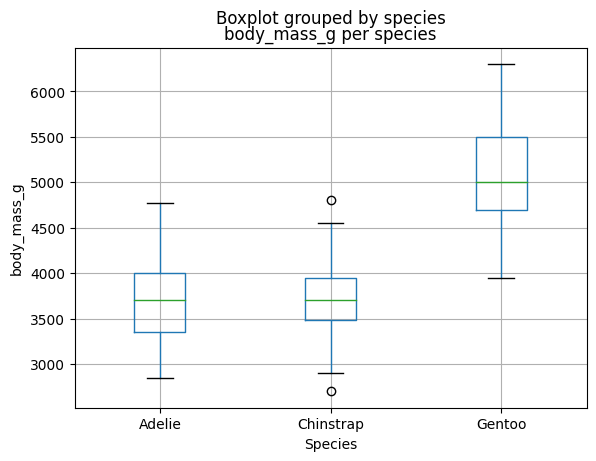

In [37]:
# body_mass per species
#ax = sns.boxplot(x="species", y="body_mass_g", data=df)
df.boxplot(column='body_mass_g', by='species')
plt.xlabel('Species')
plt.ylabel('body_mass_g')
plt.title('body_mass_g per species')